# Titanic Survival ML Project

The objective of this introductory project is to classify which passengers that survived the Titanic from those who perished.

In [3]:
# Load training and test data
import pandas as pd

train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

In [4]:
# Peep into first 10 elements of training data
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
# Look at info of training data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Perform simple descriptive stats
pd.set_option('precision', 4)
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0000,891.0000,891.0000,714.0000,891.0000,891.0000,891.0000
mean,446.0000,0.3838,2.3086,29.6991,0.5230,0.3816,32.2042
std,257.3538,0.4866,0.8361,14.5265,1.1027,0.8061,49.6934
min,1.0000,0.0000,1.0000,0.4200,0.0000,0.0000,0.0000
25%,223.5000,0.0000,2.0000,20.1250,0.0000,0.0000,7.9104
50%,446.0000,0.0000,3.0000,28.0000,0.0000,0.0000,14.4542
75%,668.5000,1.0000,3.0000,38.0000,1.0000,0.0000,31.0000
max,891.0000,1.0000,3.0000,80.0000,8.0000,6.0000,512.3292


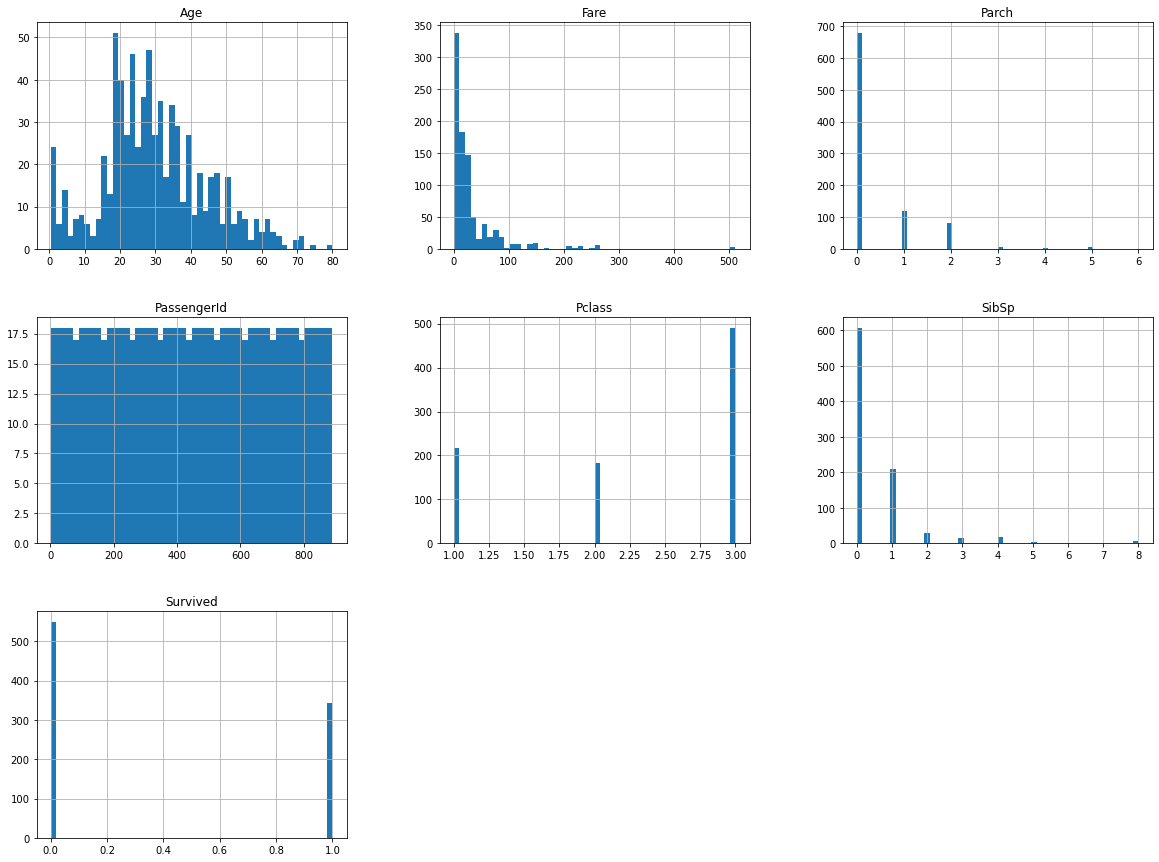

In [8]:
# Plot histograms of numerical attributes
import matplotlib.pyplot as plt

train_data.hist(bins=50, figsize=(20, 15))
plt.show()

In [15]:
# Define X (subset of total features) and y (target)
features = ["Pclass", "Sex", "SibSp", "Parch"]
X_train = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])
y_train = train_data["Survived"]

In [16]:
# Look at first 10 elements of X_train
X_train.head(10)

,Pclass,SibSp,Parch,Sex_female,Sex_male
0,3,1,0,0,1
1,1,1,0,1,0
2,3,0,0,1,0
3,1,1,0,1,0
4,3,0,0,0,1
5,3,0,0,0,1
6,1,0,0,0,1
7,3,3,1,0,1
8,3,0,2,1,0
9,2,1,0,1,0


In [17]:
# Train data with a binary classifier (start with SGD classifier)
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [18]:
# Apply model to test data
predictor_SGD = sgd_clf.predict(X_test)

In [19]:
# Apply predictor on model and save results
def outputClassifierPredictions(predictor, classifierType=None):
    output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictor})
    output.to_csv('Titanic_Survival_Results_' + classifierType + '_classifier.csv', index=False)

outputClassifierPredictions(predictor_SGD, 'SGD')

In [39]:
# Compute accuracy score of SGD classifier using cross-validation
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(sgd_clf, X_train, y_train, cv=5, scoring='accuracy')
print('Average of scores = ' + str(np.around(np.mean(scores), decimals=4)))

Average of scores = 0.7317


This classifier has a considerably low score. Let's try using a RandomForest Classifier

In [30]:
# Apply RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)

# Apply model to test data
predictor_forest = forest_clf.predict(X_test)

# Apply predictor on model and save results
outputClassifierPredictions(predictor_forest, 'RandomForest')

In [40]:
# Compute accuracy score of Random classifier using cross-validation
scores = cross_val_score(forest_clf, X_train, y_train, cv=5, scoring='accuracy')
print('Average of scores = ' + str(np.around(np.mean(scores), decimals=4)))

Average of scores = 0.7868


This classifier has a higher score than SGD Classifier but is still low. Let's try using a DecisionTree Classifier

In [42]:
# Apply DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [47]:
# Apply model to test data
predictor_tree = tree_clf.predict(X_test)

# Apply predictor on model and save results
outputClassifierPredictions(tree_clf, 'DecisionTree')

In [48]:
# Compute accuracy score of Decision Tree classifier using cross-validation
scores = cross_val_score(tree_clf, X_train, y_train, cv=5, scoring='accuracy')
print('Average of scores = ' + str(np.around(np.mean(scores), decimals=4)))

Average of scores = 0.7733


This classifier has a lower score than RandomForest Classifier but is still low.